### Importing libraraies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Setting Style for all plots

In [3]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "white"})

### Loading DataSet

In [4]:
df = pd.read_csv("climate-data.csv")

### Data preparation

In [5]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

In [6]:
df.head()

,City,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Climate_Type,Temperature (°C),Humidity (%),Date
0,Berlin,52.52,13.405,1,2015,71.56,34,Oceanic,19.6,72,2015-01-01
1,Berlin,52.52,13.405,2,2015,129.56,34,Oceanic,31.4,88,2015-02-01
2,Berlin,52.52,13.405,3,2015,24.58,34,Oceanic,15.4,61,2015-03-01
3,Berlin,52.52,13.405,4,2015,177.73,34,Oceanic,15.1,62,2015-04-01
4,Berlin,52.52,13.405,5,2015,100.62,34,Oceanic,-3.0,57,2015-05-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   City              1080 non-null   object        
 1   Latitude          1080 non-null   float64       
 2   Longitude         1080 non-null   float64       
 3   Month             1080 non-null   int64         
 4   Year              1080 non-null   int64         
 5   Rainfall (mm)     1080 non-null   float64       
 6   Elevation (m)     1080 non-null   int64         
 7   Climate_Type      1080 non-null   object        
 8   Temperature (°C)  1080 non-null   float64       
 9   Humidity (%)      1080 non-null   int64         
 10  Date              1080 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 92.9+ KB


### Calculate average values for bar charts

In [8]:
avg_rainfall_city = df.groupby('City')['Rainfall (mm)'].mean().reset_index()
avg_temp_city = df.groupby('City')['Temperature (°C)'].mean().mean()

### Principle 1 - Proportional Ink

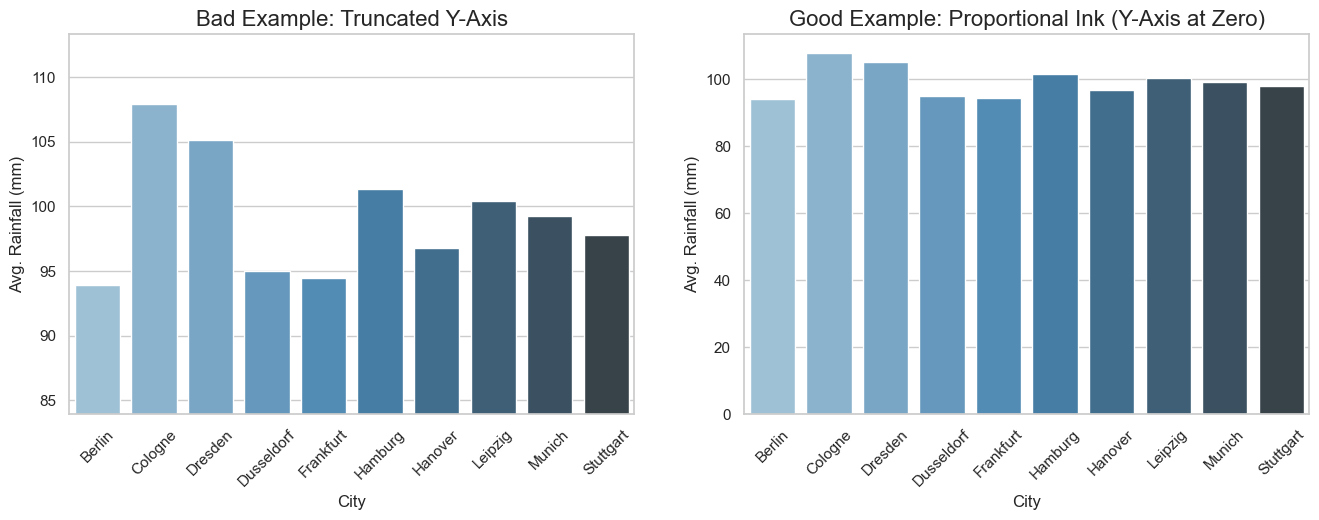

In [11]:
# Create a figure with two subplots: Bad Example (Truncated) and Good Example (Full Axis)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bad Example (Truncated Axis)
# Calulate the maximum rainfall for setting y-axis limit
min_avg = avg_rainfall_city['Rainfall (mm)'].min()
start_y = max(0, min_avg - 10)

sns.barplot(x='City', y='Rainfall (mm)', data=avg_rainfall_city, ax=axes[0], hue='City', palette="Blues_d", legend=False)
axes[0].set_ylim(bottom=start_y) # Truncate the y-axis
axes[0].set_title('Bad Example: Truncated Y-Axis', fontsize=16)
axes[0].set_ylabel('Avg. Rainfall (mm)')
axes[0].tick_params(axis='x', rotation=45)

# --- GOOD EXAMPLE: PROPORTIONAL INK ---
sns.barplot(x='City', y='Rainfall (mm)', data=avg_rainfall_city, ax=axes[1], hue='City', palette="Blues_d", legend=False)
axes[1].set_ylim(bottom=0) # Start the y-axis at zero
axes[1].set_title('Good Example: Proportional Ink (Y-Axis at Zero)', fontsize=16)
axes[1].set_ylabel('Avg. Rainfall (mm)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(pad=3.0)
plt.show()

### Principle 2 - Handling Overlapping Points

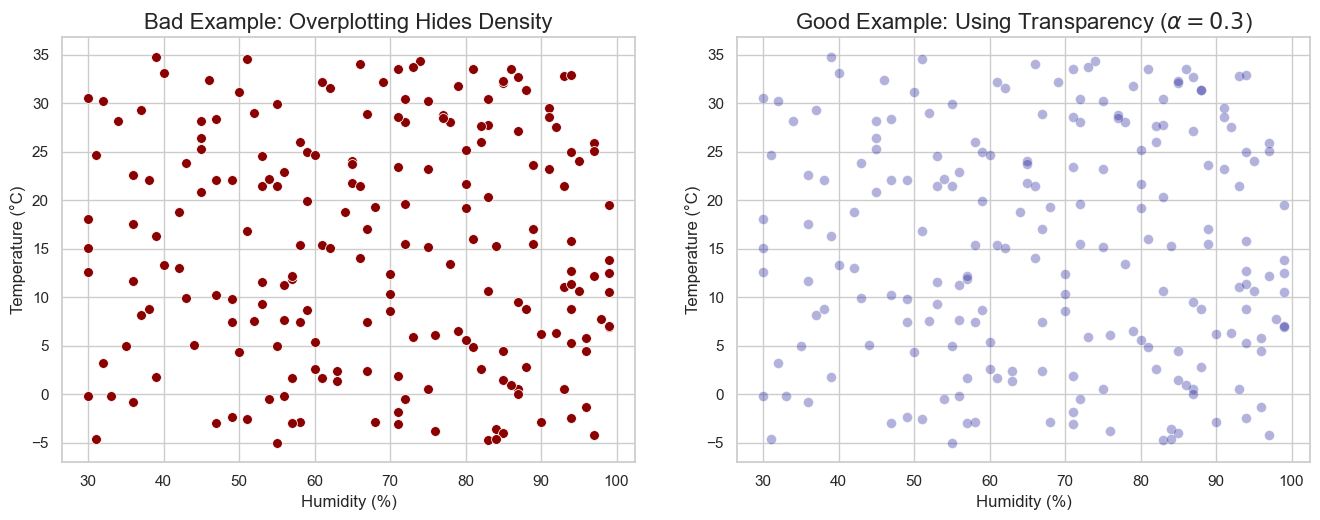

In [12]:
# Filter data for the two cities and create figures
sample_df = df[df['City'].isin(['Berlin', 'Hanover'])].sample(n=200, random_state=42)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- BAD EXAMPLE: Overplotting ---
sns.scatterplot(x='Humidity (%)', y='Temperature (°C)', data=sample_df, ax=axes[0], s=50, color='darkred')
axes[0].set_title('Bad Example: Overplotting Hides Density', fontsize=16)

# --- GOOD EXAMPLE: Transparency (Alpha) ---
# NOTE: The title uses a raw string (r'...') to properly render the LaTeX '\alpha' symbol.
sns.scatterplot(x='Humidity (%)', y='Temperature (°C)', data=sample_df, ax=axes[1], alpha=0.3, s=50, color='darkblue')
axes[1].set_title(r'Good Example: Using Transparency ($\alpha=0.3$)', fontsize=16)

plt.tight_layout(pad=3.0)
plt.show()

### Principle 3 - Common Pitfalls of Color Use

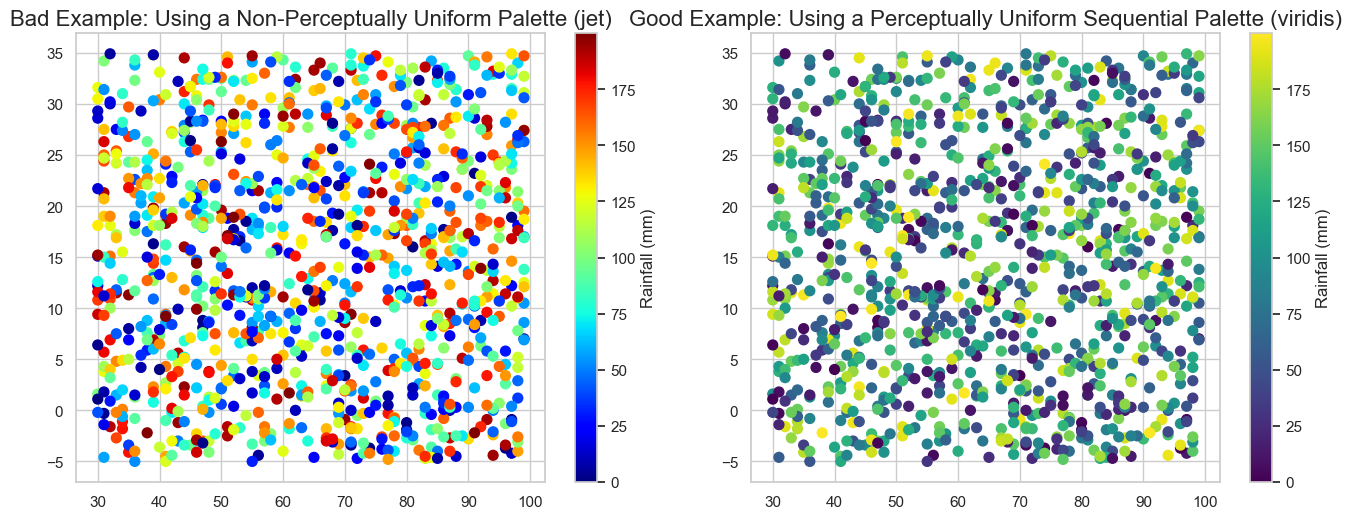

In [14]:
# create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- BAD EXAMPLE: Using 'jet' (non-perceptually uniform) for sequential data ---
# 'jet' is notorious for creating artificial boundaries and misleading the viewer.
sc1 = axes[0].scatter(df['Humidity (%)'], df['Temperature (°C)'], c=df['Rainfall (mm)'], cmap='jet', s=50)
axes[0].set_title('Bad Example: Using a Non-Perceptually Uniform Palette (jet)', fontsize=16)
cbar1 = plt.colorbar(sc1, ax=axes[0], label='Rainfall (mm)')

# --- GOOD EXAMPLE: Using a perceptually uniform sequential palette ('viridis') ---
sc2 = axes[1].scatter(df['Humidity (%)'], df['Temperature (°C)'], c=df['Rainfall (mm)'], cmap='viridis', s=50)
axes[1].set_title('Good Example: Using a Perceptually Uniform Sequential Palette (viridis)', fontsize=16)
cbar2 = plt.colorbar(sc2, ax=axes[1], label='Rainfall (mm)')

plt.tight_layout(pad=3.0)
plt.show()

### Principle 4 - Redundant Coding

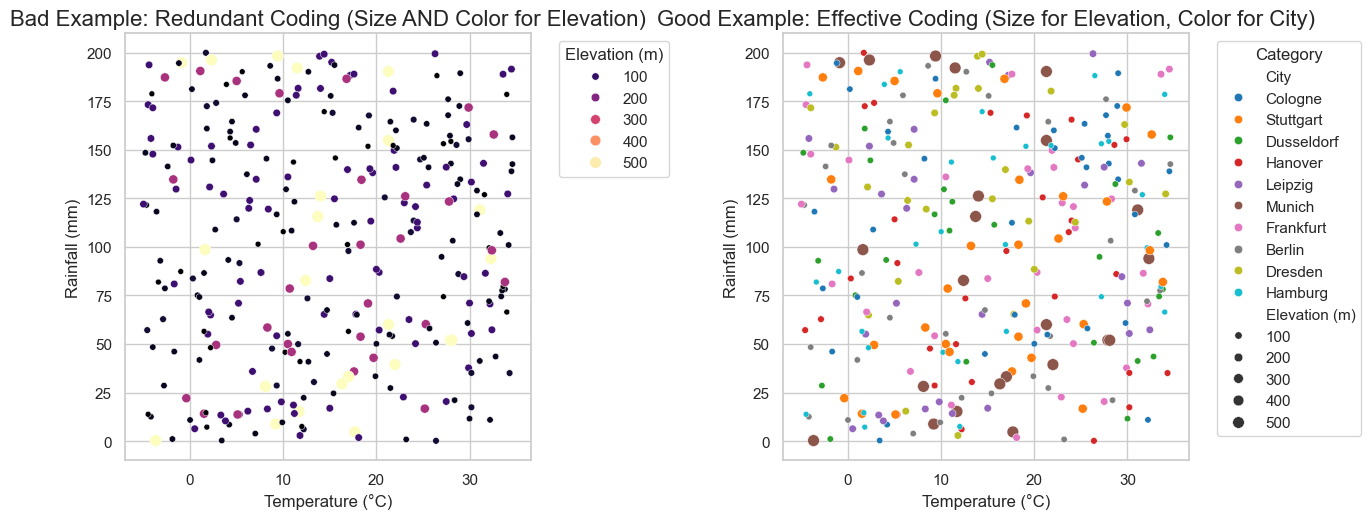

In [15]:
# create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- BAD EXAMPLE: Redundant Coding ---
# Both color and size are mapped to Elevation. This is repetitive.
sns.scatterplot(
    x='Temperature (°C)', y='Rainfall (mm)',
    size='Elevation (m)', hue='Elevation (m)',
    data=df.sample(n=300, random_state=42), # Sampling to avoid clutter
    ax=axes[0], palette='magma'
)
axes[0].set_title('Bad Example: Redundant Coding (Size AND Color for Elevation)', fontsize=16)
axes[0].legend(title='Elevation (m)', loc='upper left', bbox_to_anchor=(1.05, 1))

# --- GOOD EXAMPLE: Effective Coding ---
# Only size is used for Elevation, while color is used for a different categorical variable (City).
sns.scatterplot(
    x='Temperature (°C)', y='Rainfall (mm)',
    size='Elevation (m)', hue='City',
    data=df.sample(n=300, random_state=42),
    ax=axes[1], palette='tab10'
)
axes[1].set_title('Good Example: Effective Coding (Size for Elevation, Color for City)', fontsize=16)
axes[1].legend(title='Category', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout(pad=3.0)
plt.show()

### Principle 5 - Multi-panel Figures

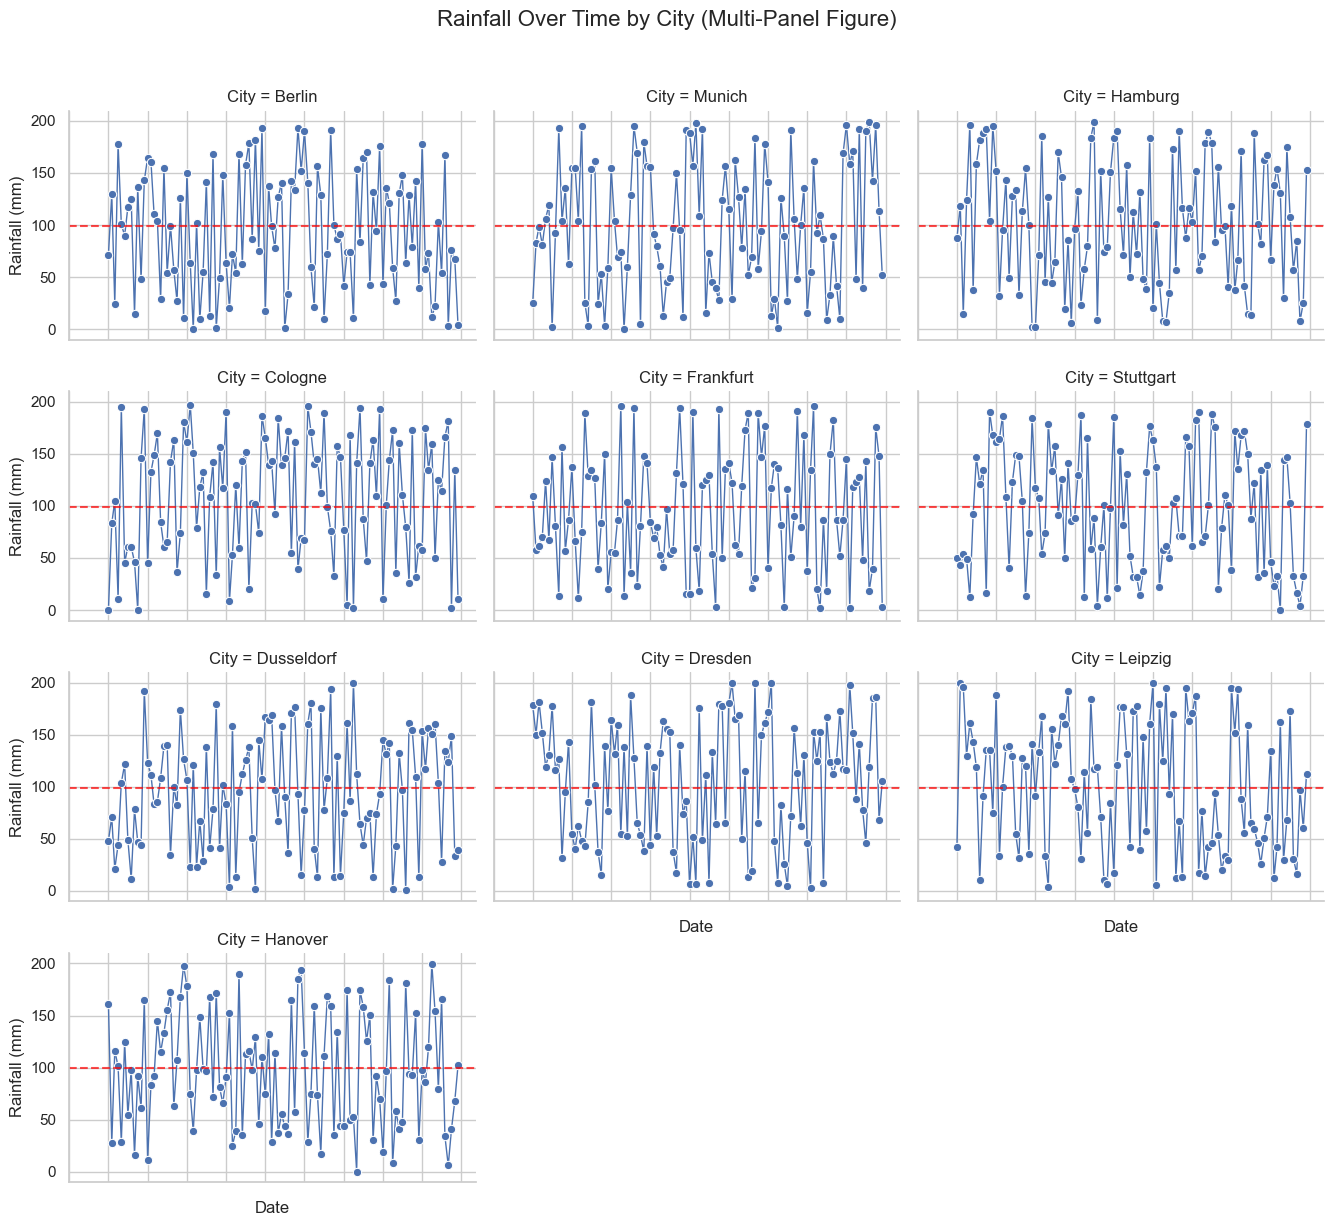

In [16]:
# Create a FacetGrid with small and multi-panel figures
g = sns.FacetGrid(df, col="City", col_wrap=3, height=3, aspect=1.5, sharey=True)
g.map(sns.lineplot, "Date", "Rainfall (mm)", marker='o', linewidth=1)
g.fig.suptitle('Rainfall Over Time by City (Multi-Panel Figure)', y=1.02, fontsize=16)
g.set_axis_labels("Date", "Rainfall (mm)")
g.set_xticklabels(rotation=45, ha='right')

# Add a horizontal line to each subplot for the overall average rainfall
for ax in g.axes.flat:
    ax.axhline(avg_rainfall_city['Rainfall (mm)'].mean(), color='red', linestyle='--', alpha=0.7, label='Overall Avg')
    ax.legend([],[], frameon=False) # Clear existing legend

plt.tight_layout()
plt.show()

### Principle 6 - Titles, Captions, and Tables

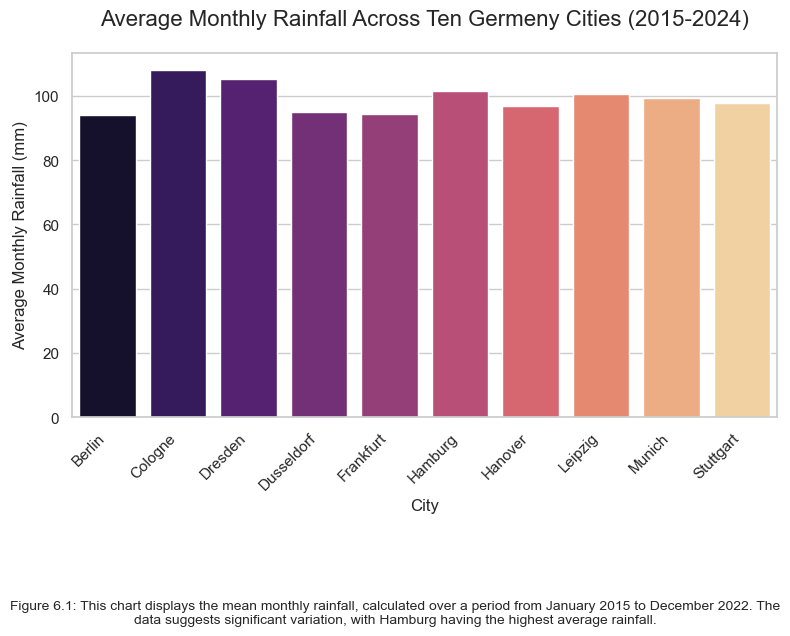

In [18]:
# Create plot figure for bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='City', y='Rainfall (mm)', data=avg_rainfall_city, hue='City', palette="magma", legend=False)

# --- Title ---
plt.title('Average Monthly Rainfall Across Ten Germeny Cities (2015-2024)', fontsize=16, pad=20)

# --- Axis Labels ---
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Monthly Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# --- Caption (Note: This is simulated in the plot space for demonstration) ---
# In a report, this would typically be a text block below the figure.
caption_text = (
    "Figure 6.1: This chart displays the mean monthly rainfall, calculated over a period from January 2015 to December 2022. "
    "The data suggests significant variation, with Hamburg having the highest average rainfall."
)
plt.figtext(0.5, -0.05, caption_text, wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout(rect=[0, 0.1, 1, 1]) # Adjust layout for the caption text
plt.show()

### Principle 7 - Balance the Data and the Context

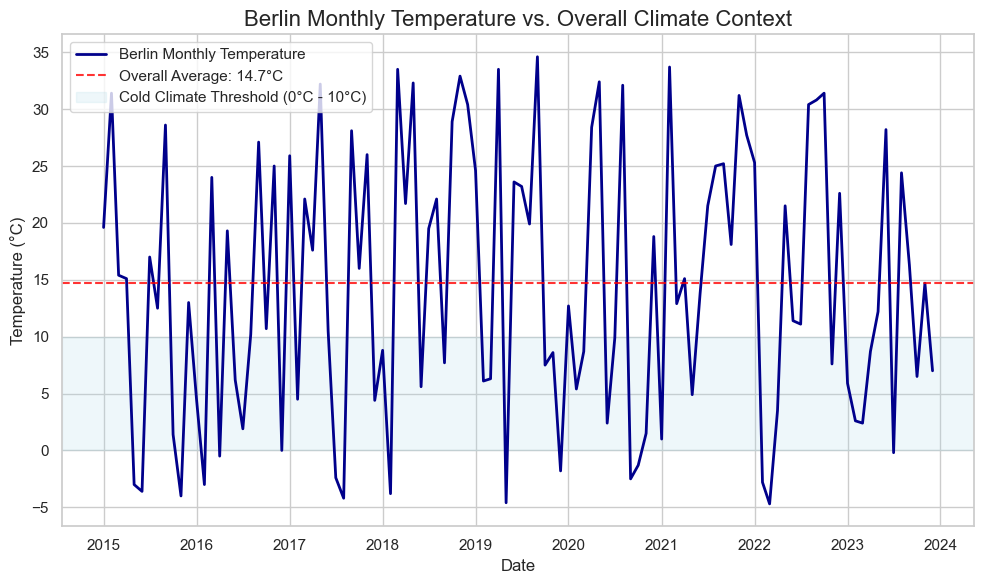

In [20]:
# selecting the data for Berlin and sorting by the Date column and create figure
berlin_df = df[df['City'] == 'Berlin'].sort_values('Date')
plt.figure(figsize=(10, 6))

# --- Data ---
sns.lineplot(x='Date', y='Temperature (°C)', data=berlin_df, label='Berlin Monthly Temperature', linewidth=2, color='darkblue')

# --- Context ---
# 1. Overall average line
plt.axhline(avg_temp_city, color='red', linestyle='--', alpha=0.8, label=f'Overall Average: {avg_temp_city:.1f}°C')
# 2. Shaded region for typical climate boundaries (e.g., 0-10°C as 'Cold' months)
plt.axhspan(0, 10, color='lightblue', alpha=0.2, label='Cold Climate Threshold (0°C - 10°C)')

plt.title('Berlin Monthly Temperature vs. Overall Climate Context', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


### Principle 8 - Use Larger Axis Labels

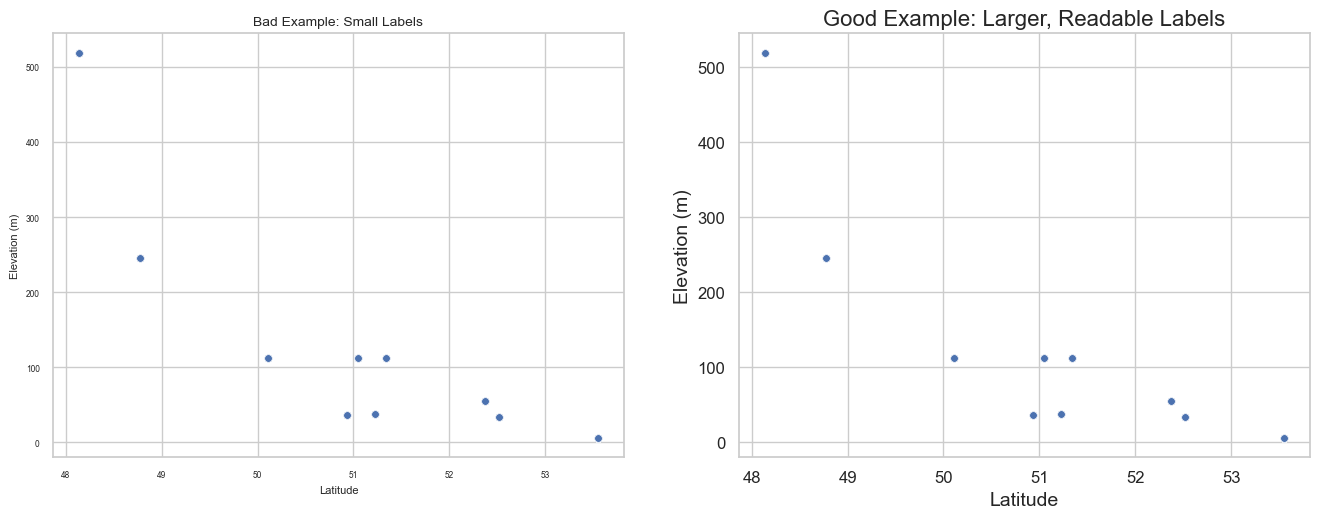

In [21]:
# create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='Latitude', y='Elevation (m)', data=df, ax=axes[0], s=30)
axes[0].set_title('Bad Example: Small Labels', fontsize=10) # Small title
axes[0].set_xlabel('Latitude', fontsize=8) # Tiny X label
axes[0].set_ylabel('Elevation (m)', fontsize=8) # Tiny Y label
axes[0].tick_params(axis='both', which='major', labelsize=6) # Tiny ticks

# --- GOOD EXAMPLE: Larger Axis Labels ---
sns.scatterplot(x='Latitude', y='Elevation (m)', data=df, ax=axes[1], s=30)
axes[1].set_title('Good Example: Larger, Readable Labels', fontsize=16) # Larger title
axes[1].set_xlabel('Latitude', fontsize=14) # Readable X label
axes[1].set_ylabel('Elevation (m)', fontsize=14) # Readable Y label
axes[1].tick_params(axis='both', which='major', labelsize=12) # Readable ticks

plt.tight_layout(pad=3.0)
plt.show()
